In [1]:
import os 
import matplotlib.pyplot as plt
import jax.numpy as jnp
import numpy as np
from dataset.generate_dataset import partial_sample_prosail_vars
from prosailvae.ProsailSimus import ProsailSimulator, SensorSimulator
import torch
from prosailvae.prosail_var_dists import get_prosail_var_dist

/home/yoel/Documents/Dev/PROSAIL-VAE/prosailpython/prosail/spectral_library.py:24: UserWarning: WARNING: Spectra data should only be read at intialization.
  warnings.warn("WARNING: Spectra data should only be read at intialization.")


In [2]:
rsr_dir = '/home/yoel/Documents/Dev/PROSAIL-VAE/prosailvae/data'
psimulator = ProsailSimulator()
bands = [1, 2, 3, 4, 5, 6, 7, 8, 11, 12] # B2, B3, B4, B5, B6, B7, B8, B8A, B11, B12    B3, B4, B5, B6, B7,     B8A, B11, B12
ssimulator = SensorSimulator(rsr_dir + "/sentinel2.rsr", bands=bands)
nb_simus = 1
lai_corr = True
lai_corr_mode = "v2"
lai_thresh = False
prosail_var_dist_type = "new_v2"
prosail_var_dist = get_prosail_var_dist(prosail_var_dist_type)

In [39]:

n = 1000
diff_max = np.zeros((n))
for k in range(n):
    prosail_vars = partial_sample_prosail_vars(prosail_var_dist, n_samples=1, 
                                                        uniform_mode=False, lai_corr=lai_corr, 
                                                        lai_var_dist=None, lai_corr_mode=lai_corr_mode,
                                                        lai_thresh=lai_thresh)
    N_resampled = torch.arange(1.2, 1.9, 0.1)
    bands_sim = np.zeros((len(N_resampled), len(bands)))
    for i, N in enumerate(N_resampled):
        prosail_vars[:,0] = N
        prosail_r = psimulator(torch.from_numpy(prosail_vars).view(nb_simus,-1).float())
        sim_s2_r = ssimulator(prosail_r).numpy()
        bands_sim[i, :] = sim_s2_r
    min_bands = bands_sim.min(0)
    max_bands = bands_sim.max(0)
    mean_bands = bands_sim.mean(0)
    diff_max[k] = (max_bands - min_bands).max()

(array([ 12.,   8.,  11.,  16.,  12.,  21.,  12.,  23.,  30.,  33.,  46.,
        125., 193., 233., 111.,  57.,  35.,  19.,   2.,   1.]),
 array([4.44585457e-05, 3.73648084e-03, 7.42850313e-03, 1.11205254e-02,
        1.48125477e-02, 1.85045700e-02, 2.21965923e-02, 2.58886146e-02,
        2.95806369e-02, 3.32726592e-02, 3.69646815e-02, 4.06567038e-02,
        4.43487260e-02, 4.80407483e-02, 5.17327706e-02, 5.54247929e-02,
        5.91168152e-02, 6.28088375e-02, 6.65008598e-02, 7.01928821e-02,
        7.38849044e-02]),
 <BarContainer object of 20 artists>)

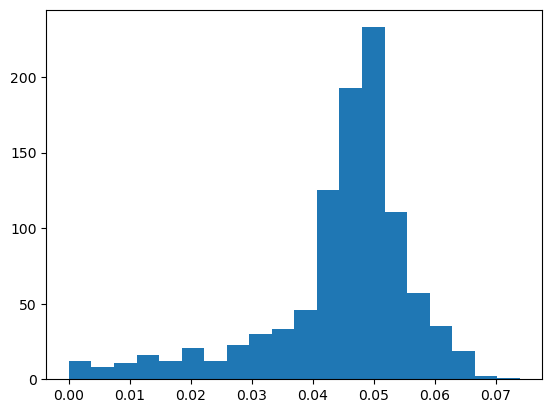

In [40]:
plt.figure()
plt.hist(diff_max, bins=20)

(array([ 10.,   5.,  10.,  12.,  11.,  10.,  11.,  30.,  16.,  38.,  64.,
        114., 218., 213., 112.,  71.,  30.,  11.,  12.,   2.]),
 array([0.00038805, 0.00769951, 0.01501096, 0.02232242, 0.02963388,
        0.03694533, 0.04425679, 0.05156824, 0.0588797 , 0.06619116,
        0.07350261, 0.08081407, 0.08812553, 0.09543698, 0.10274844,
        0.11005989, 0.11737135, 0.12468281, 0.13199426, 0.13930572,
        0.14661717]),
 <BarContainer object of 20 artists>)

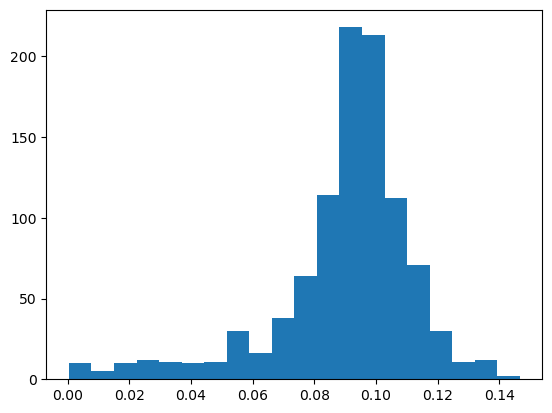

In [38]:
plt.figure()
plt.hist(diff_max, bins=20)

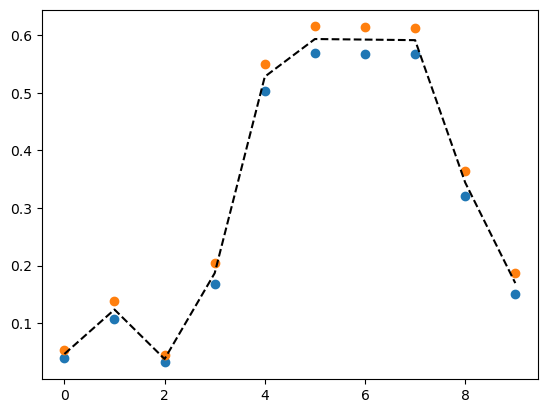

In [33]:
plt.figure()
plt.scatter(np.arange(0, len(max_bands)), min_bands)
plt.scatter(np.arange(0, len(max_bands)),max_bands)
plt.plot(mean_bands, 'k--')

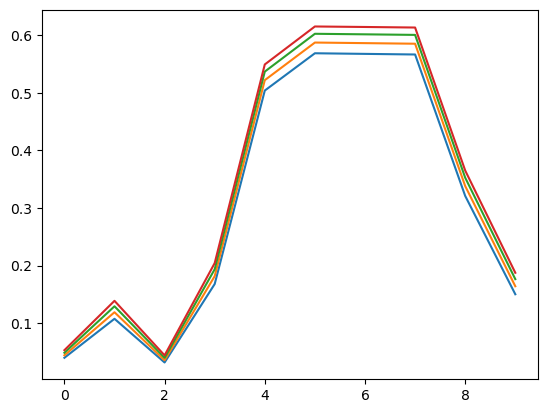

In [31]:
plt.figure()
plt.plot(bands_sim.transpose())